# Breast Cancer Detection
> Diagnosing Breast Cancer using Random Forest Classifier. It evaluates the model using k-fold cross-validation, optimizes hyperparameters using GridSearchCV, and reports final performance metrics on a test set.


In [35]:
# needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler # scale features to the same order
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Load dataset
cancer = datasets.load_breast_cancer()

### Lets check the features and target of the data.

In [13]:
# names of the 13 features
print("Features: ", cancer.feature_names)

# the label for the type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


## Distribution of features
- Lets look at the histograms of the features.

In [27]:
# assigning to x and y
x = cancer.data
y = cancer.target

### Distribution of Cancer Diagnosis  
This histogram displays the distribution of cancer diagnoses in the dataset.  
- **0 (Negative)**: No cancer detected  
- **1 (Positive)**: Cancer detected  
The dataset is **imbalanced**, so this visualization helps understand class distribution before model training.

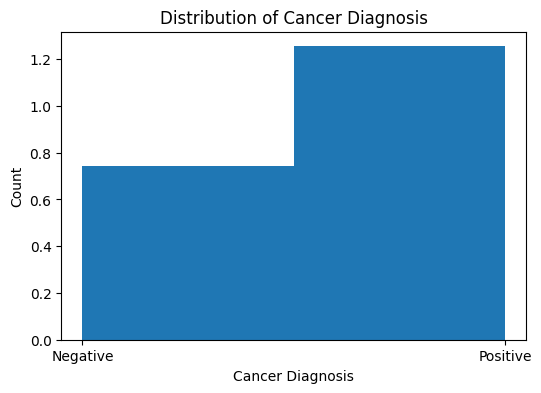

In [31]:
# Histogram of target variable
plt.figure(figsize=(6, 4))
plt.hist(y, bins=2, density=True, histtype='bar')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Cancer Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Cancer Diagnosis")
plt.show()

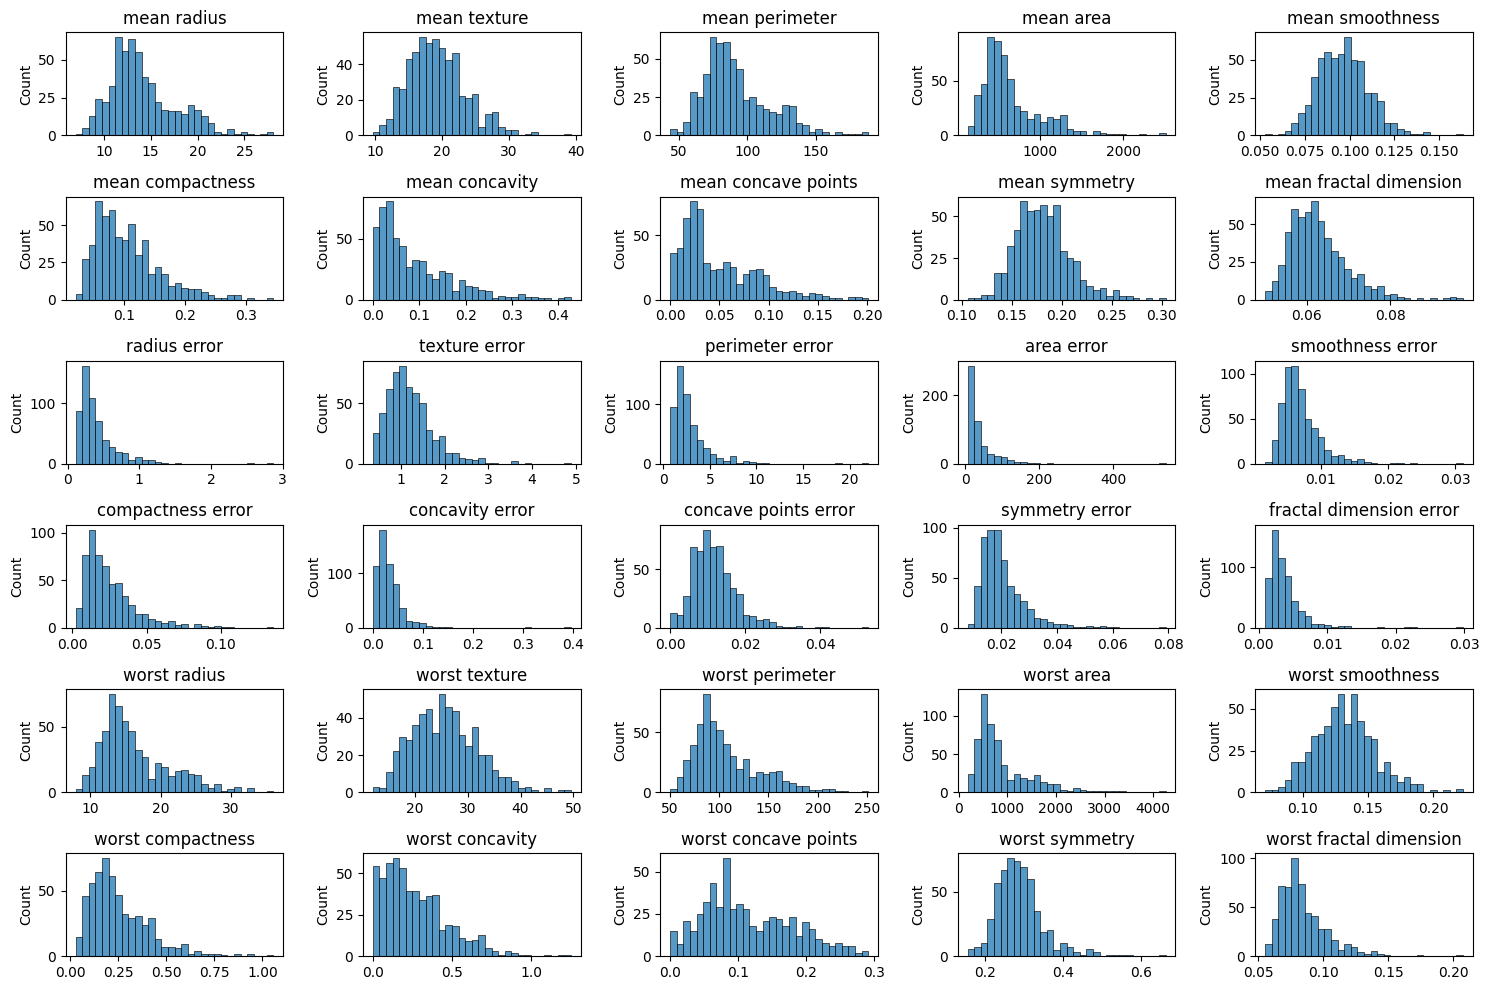

In [34]:
# Histograms of features
import numpy as np
feature_names = cancer.feature_names
num_features = x.shape[1]
n_cols = 5
n_rows = int(np.ceil(num_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()
for i in range(num_features):
    sns.histplot(x[:, i], bins=30, ax=axes[i])
    axes[i].set_title(feature_names[i])
plt.tight_layout()
plt.show()

### Histograms of Features  
The histograms above show the distribution of individual features in the dataset.  
- Each plot represents a different feature used in classification.  
- Understanding feature distributions helps in detecting skewness or the need for transformation.  
- Features with **bimodal or skewed distributions** may indicate significant patterns for classification.

### splitting to train and test.
> the data is split (80/20) to training and testing set. Stratify is applied to oversample the minority class. This prevents overfitting. 

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2,
                                             random_state=23, # for reproducibility
                                             stratify=y) # for minority class

### Perfoming k-fold cross validation.

In [17]:
# creating an instance of random forest
rf = RandomForestClassifier(random_state=23)

# 5 kfold cross validation
scores = cross_val_score(rf, xtrain, ytrain, cv=5,
                        scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")

Cross-validation accuracy scores: [0.97802198 0.94505495 0.95604396 0.95604396 0.95604396]
Mean CV accuracy: 0.9582


### Hyperparameter tuning with GridSearchCV
> GridSearchCV is used to search for the best combination of hyperparameters.

In [18]:
param_grid = {
    'n_estimators':[50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}

# initialize gridsearchcv
grid = GridSearchCV(rf, param_grid, cv=5,
                   scoring='accuracy', n_jobs=-1) # njobs means we use all the processors.
grid.fit(xtrain,ytrain)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [19]:
# Best parameters
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Model Evaluation
>  The best hyperparameters from GridSearchCV are selected and evaluated on the test set.

In [20]:
# Evaluate the best model on the test set
best_model = grid.best_estimator_
ypred = best_model.predict(xtest)

test_accuracy = accuracy_score(ytest, ypred)
test_precision = precision_score(ytest, ypred)
test_recall = recall_score(ytest, ypred)
test_f1 = f1_score(ytest, ypred)

print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")
print(f"Test F1-score: {test_f1:.4f}")

Test accuracy: 0.9386
Test precision: 0.9577
Test recall: 0.9444
Test F1-score: 0.9510


In [21]:
# Compute sensitivity and specificity
cm = confusion_matrix(ytest, ypred)
tn, fp, fn, tp = cm.ravel() # used to flatten the confusion matrix
specificity = tn / (tn + fp) 

print(f"Test sensitivity: {test_recall:.4f}") # sensitivity is the same as recall
print(f"Test specificity: {specificity:.4f}")

Test sensitivity: 0.9444
Test specificity: 0.9286


### Confusion Matrix

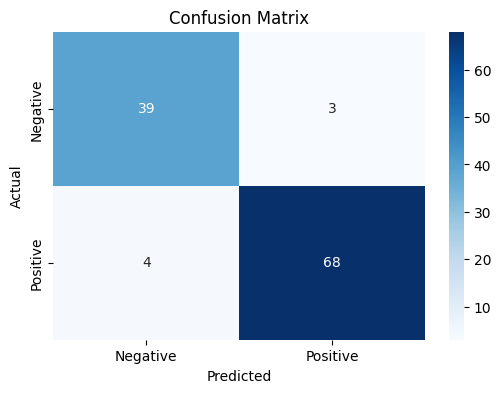

In [22]:
# Visualization: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance in Random Forest
This bar chart shows the **importance of each feature** in the Random Forest model.  
Features with higher importance contribute more to the classification decision.  
By analyzing this, we can identify which factors are most influential in predicting breast cancer.

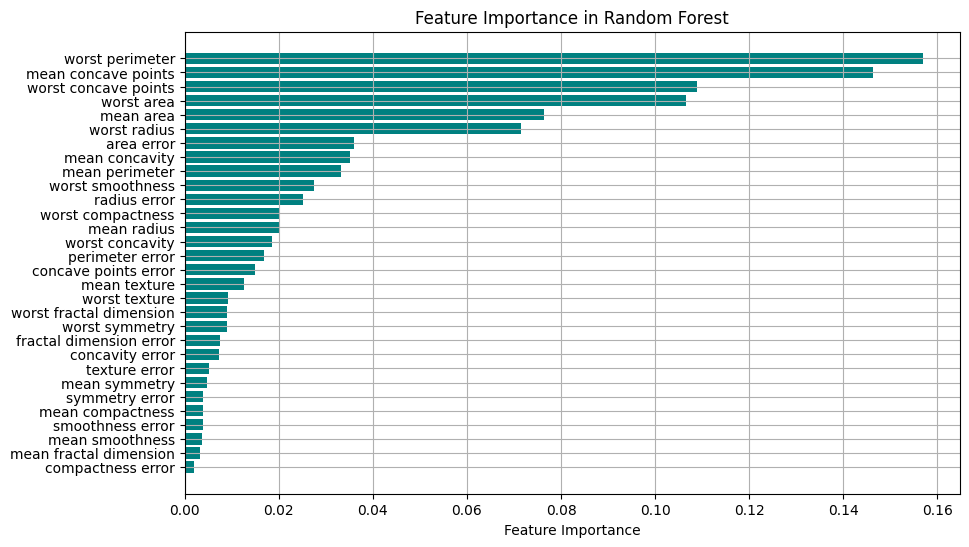

In [26]:
# Visualization: Feature Importance
feature_importances = best_model.feature_importances_ # derived from the model
feature_names = cancer.feature_names
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], feature_importances[sorted_idx], color='teal')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.grid()
plt.show()

### Learning Curves  

The learning curve visualizes how the model's performance changes with different training set sizes.  

- **Training Accuracy (Teal Line)**: Measures how well the model fits the training data. A very high training accuracy but low validation accuracy may indicate **overfitting**.  
- **Validation Accuracy (Orange Line)**: Represents model performance on unseen data. If it remains consistently low, the model might be **underfitting**.  
- **Convergence**: If both lines converge, it suggests the model generalizes well.  

  


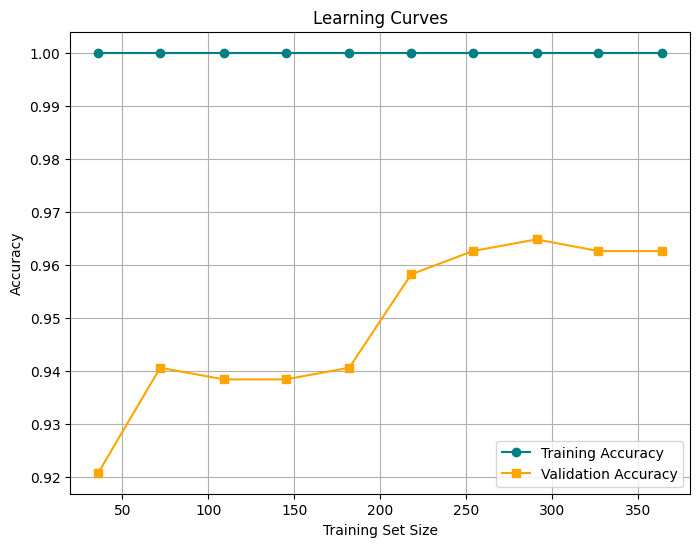

In [36]:
# Visualization: Learning Curves
train_sizes, train_scores, test_scores = learning_curve(best_model, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o', color='teal')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s', color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.grid()
plt.show()

This plot helps in diagnosing whether **more data**, **better features**, or **regularization** is needed for improvement.
Clearly more data is needed to improve the validation accuracy.

## Conclusion
This approach ensures robust model selection by preventing overfitting through cross-validation and fine-tuning hyperparameters, monitoring learning curves and feature importance for optimal performance.
